Set up data

In [ ]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target
y = df.iloc[0:100,4].values
y = np.where(y == 0, 0, 1)
X = df.iloc[0:100, [0,2]].values

Compare Adaline with learning rates 0.1 and 0.0001

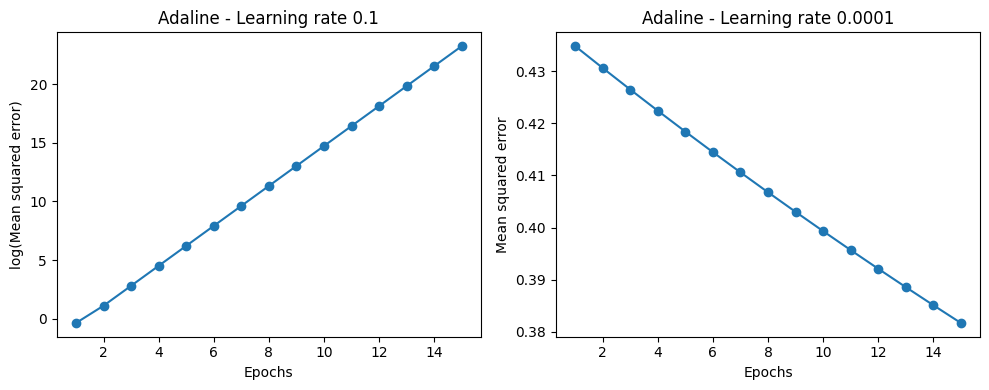

In [ ]:
from adaline import Adaline
import matplotlib.pyplot as plt

# eta = 0.1
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
ada1 = Adaline(n_iter=15, learning_rate=0.1).fit(X, y)
ax[0].plot(range(1, len(ada1.losses_) + 1),np.log10(ada1.losses_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Mean squared error)')
ax[0].set_title('Adaline - Learning rate 0.1')

# eta = 0.0001
ada2 = Adaline(n_iter=15, learning_rate=0.0001).fit(X, y)
ax[1].plot(range(1, len(ada2.losses_) + 1),ada2.losses_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Mean squared error')
ax[1].set_title('Adaline - Learning rate 0.0001')

plt.tight_layout()
plt.show()

Standardizing features

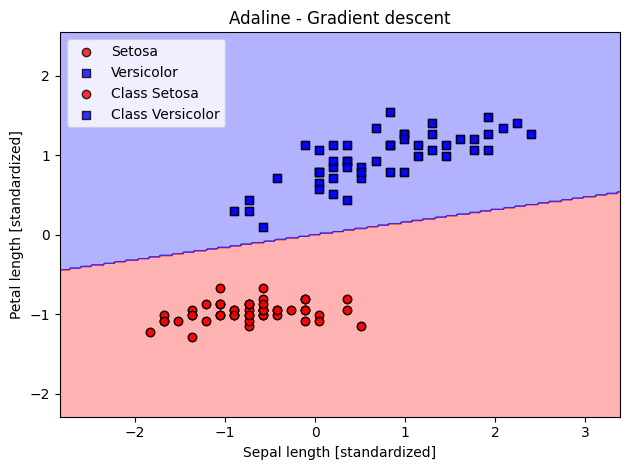

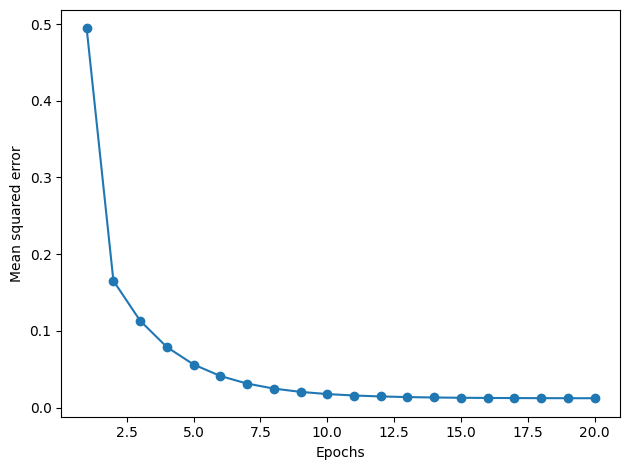

In [ ]:
X_std = np.copy(X)
X_std[:,0] = (X[:,0] - X[:,0].mean()) / X[:,0].std()
X_std[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()
ada_gd = Adaline(learning_rate=0.5, n_iter=20)
ada_gd.fit(X_std, y)

ada_gd.plot_decision_regions(X_std,y)
plt.title('Adaline - Gradient descent')
plt.xlabel('Sepal length [standardized]')
plt.ylabel('Petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

plt.plot(range(1, len(ada_gd.losses_) + 1), ada_gd.losses_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Mean squared error')
plt.tight_layout()
plt.show()